## __Import__

In [47]:
import pandas as pd
import numpy as np
from statsbombpy import sb
from ast import literal_eval
from dataloader import load_data
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, Standardizer
import math


def load_event_data(match=False):
    if match:
        COMPETITION_ID = 9
        SEASON_ID = 27
        MATCH_ID = 3890561 
        df = sb.events(match_id=MATCH_ID)
        return df
    else:
        df = load_data(frac=(0.5))
        return df

MATCH=False
df = load_event_data(match=MATCH)

# only relevants cols
columns = ['player',"type","duration",'location', 'under_pressure',"carry_end_location" , 
           "dribble_nutmeg", "dribble_no_touch",  "dribble_outcome", "dribble_overrun",
           'duel_type','duel_outcome', "counterpress", "ball_receipt_outcome", "foul_won_penalty", "miscontrol_aerial_won"]
try:
    df = df[columns]
except:
    df["dribble_no_touch"] = np.nan
    df = df[columns]

[2025-03-01 14:54:36] File exists
[2025-03-01 14:54:36] Loading data form local file system


c:\Users\Alexander Lorenz\Documents\GitHub\ai-fc\src\dataloader.py:76: DtypeWarning: Columns (2,10,12,16,18,39,40,42,65,71,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path).sample(frac=frac, random_state=42)


[2025-03-01 14:54:47] File loaded with shape: (534933, 115)


In [2]:
df["type"].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Block', 'Ball Recovery', 'Miscontrol', 'Interception',
       'Foul Committed', 'Foul Won', 'Shot', 'Goal Keeper', 'Duel',
       'Dribble', 'Dribbled Past', 'Clearance', 'Dispossessed',
       'Tactical Shift', 'Injury Stoppage', 'Player Off', 'Player On',
       'Half End', 'Substitution', 'Shield', 'Own Goal Against',
       'Own Goal For'], dtype=object)

## __Setting types__

In [48]:
def convert_to_list(input_data):
    if(isinstance(input_data, str)):
        try:
            return literal_eval(input_data)
        except (ValueError, SyntaxError):
            print(f"Error: The string {input_data} could not be converted to a list.")
            return None
    return input_data
    
df["location"] = df["location"].apply(convert_to_list)
df["carry_end_location"] = df["carry_end_location"].apply(convert_to_list)
df[["x", "y"]] = df["location"].apply(pd.Series)
df[["x_end_carry", "y_end_carry"]] = df["carry_end_location"].apply(pd.Series)
df["under_pressure"] = df["under_pressure"] == True
df

,player,type,duration,location,under_pressure,carry_end_location,dribble_nutmeg,dribble_no_touch,dribble_outcome,dribble_overrun,duel_type,duel_outcome,counterpress,ball_receipt_outcome,foul_won_penalty,miscontrol_aerial_won,x,y,x_end_carry,y_end_carry
722885,Andreas Christensen,Carry,2.734774,"[30.2, 57.0]",False,"[33.0, 60.6]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.2,57.0,33.0,60.6
998158,Fabian Lukas Schär,Ball Receipt*,NaN,"[5.9, 66.8]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,66.8,NaN,NaN
819908,Jeremy Toljan,Pass,1.864267,"[29.6, 78.7]",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6,78.7,NaN,NaN
357919,Ralf Fährmann,Pass,1.999999,"[16.7, 57.9]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.7,57.9,NaN,NaN
972949,Marcel Schmelzer,Block,0.000000,"[75.0, 5.6]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,5.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911104,NaN,Starting XI,0.000000,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686055,Julian Korb,Ball Receipt*,NaN,"[67.7, 80.0]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.7,80.0,NaN,NaN
476946,David Ángel Abraham,Pressure,0.390729,"[24.7, 17.4]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.7,17.4,NaN,NaN
909440,Kevin Volland,Carry,4.539837,"[70.9, 57.2]",True,"[77.4, 74.1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.9,57.2,77.4,74.1


In [56]:
df.loc[df["type"]=='Ball Receipt*']

,player,type,duration,location,under_pressure,carry_end_location,dribble_nutmeg,dribble_no_touch,dribble_outcome,dribble_overrun,duel_type,duel_outcome,counterpress,ball_receipt_outcome,foul_won_penalty,miscontrol_aerial_won,x,y,x_end_carry,y_end_carry
998158,Fabian Lukas Schär,Ball Receipt*,NaN,"[5.9, 66.8]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,66.8,NaN,NaN
133045,Hakan Çalhanoğlu,Ball Receipt*,NaN,"[35.9, 6.0]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.9,6.0,NaN,NaN
582805,Josuha Guilavogui,Ball Receipt*,NaN,"[38.0, 44.4]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,44.4,NaN,NaN
270997,Lukáš Hrádecký,Ball Receipt*,NaN,"[11.8, 61.1]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8,61.1,NaN,NaN
768058,Kevin Kampl,Ball Receipt*,NaN,"[70.4, 7.6]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.4,7.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486207,Kevin Volland,Ball Receipt*,NaN,"[80.6, 63.9]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.6,63.9,NaN,NaN
347119,Ermin Bičakčić,Ball Receipt*,NaN,"[108.0, 42.5]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete,NaN,NaN,108.0,42.5,NaN,NaN
856390,Felix Wiedwald,Ball Receipt*,NaN,"[4.2, 51.7]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,51.7,NaN,NaN
373598,Konstantinos Stafylidis,Ball Receipt*,NaN,"[41.1, 11.9]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.1,11.9,NaN,NaN


## __Generate Touches__

In [28]:
# only touches 
touches = ['Pass', 'Ball Receipt*', 'Carry','Clearance',"Foul Won", 'Block', 'Ball Recovery' , 'Duel', "Dribble", 'Interception', 'Miscontrol', 'Shot']
df_touches = df[df["type"].isin(touches)].copy()
df_touches

,player,type,duration,location,under_pressure,carry_end_location,dribble_nutmeg,dribble_no_touch,dribble_outcome,dribble_overrun,duel_outcome,duel_type,ball_receipt_outcome,foul_won_penalty,miscontrol_aerial_won,x,y,x_end_carry,y_end_carry
722885,Andreas Christensen,Carry,2.734774,"[30.2, 57.0]",False,"[33.0, 60.6]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.2,57.0,33.0,60.6
998158,Fabian Lukas Schär,Ball Receipt*,NaN,"[5.9, 66.8]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,66.8,NaN,NaN
819908,Jeremy Toljan,Pass,1.864267,"[29.6, 78.7]",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6,78.7,NaN,NaN
357919,Ralf Fährmann,Pass,1.999999,"[16.7, 57.9]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.7,57.9,NaN,NaN
972949,Marcel Schmelzer,Block,0.000000,"[75.0, 5.6]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,5.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909855,Gonzalo Castro Randon,Carry,2.611069,"[65.6, 63.1]",False,"[75.4, 67.4]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.6,63.1,75.4,67.4
142531,Pablo Ezequiel De Blasis,Ball Receipt*,NaN,"[90.5, 74.4]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.5,74.4,NaN,NaN
924508,Max Kruse,Pass,1.478936,"[50.2, 78.7]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.2,78.7,NaN,NaN
142767,Giulio Donati,Carry,1.931194,"[43.0, 8.6]",True,"[50.4, 4.3]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,8.6,50.4,4.3


### aggregation function

In [60]:
def is_in_penalty_area(x, y):
    pitch_width = 120
    x_axis = ((102 <= x) and (x <= pitch_width))  # Stop before goal area
    y_axis = ((40 - 22) <= y and y <= (40 + 22))
    return x_axis and y_axis

def is_in_defensive_penalty_area(x, y):
    x_axis = ((0 <= x) and (x <= 18))  # Stop before goal area
    y_axis = ((40 - 22) <= y and y <= (40 + 22))
    return x_axis and y_axis

def is_in_edge_of_the_box(x,y):
    pitch_width = 120
    x_axis = ((102 <= x) and (x <= pitch_width))
    y_axis = ((40 - 10) <= y and y <= (40 + 10))
    return x_axis and y_axis

def get_shot_distance(x_start,y_start,x_end,y_end):
    #print("Executing is_short_distance_shot method")

    start = np.array([x_start, y_start])
    end = np.array([x_end, y_end])

    return np.linalg.norm(start - end)

def is_progressive_carry(start_x, start_y, end_x, end_y):
    """
    Check if a carry is progressive towards the goal area.
    
    A carry is progressive if the end position is closer to the goal area than the start position.
    
    Args:
        start_x (float): x-coordinate of the carry start position
        start_y (float): y-coordinate of the carry start position
        end_x (float): x-coordinate of the carry end position
        end_y (float): y-coordinate of the carry end position
        pitch_width (float): width of the pitch
        
    Returns:
        bool: True if the carry is progressive, False otherwise
    """
    goal_center_x = 120
    goal_center_y = 40
    
    # Calculate distances from start and end points to the goal center
    start_distance = ((start_x - goal_center_x) ** 2 + (start_y - goal_center_y) ** 2) ** 0.5
    end_distance = ((end_x - goal_center_x) ** 2 + (end_y - goal_center_y) ** 2) ** 0.5
    
    # A carry is progressive if the end point is closer to the goal center than the start point
    return end_distance < start_distance


def analyze_touches(df):
    """
    This function Pre-compute all conditions for Vectorize operations.
    Returns results grouped by player and under_pressure  
    """
    # Pre-compute all conditions
    df_with_flags = df.copy()

    # Location-based flags
    df_with_flags['is_attacking_third'] = df['x'] >= 80
    df_with_flags['is_middle_third'] = (80 > df['x']) & (df['x'] > 40)
    df_with_flags['is_defending_third'] = df['x'] <= 40
    df_with_flags['is_in_box'] = df[["x","y"]].apply(lambda row: is_in_penalty_area(row['x'], row['y']), axis=1)
    df_with_flags['is_in_edge_box'] = df[["x","y"]].apply(lambda row: is_in_edge_of_the_box(row['x'], row['y']), axis=1)
    df_with_flags['is_in_defending_box'] = df[["x","y"]].apply(lambda row: is_in_defensive_penalty_area(row['x'], row['y']), axis=1)
    df_with_flags['ends_attacking_third'] = df['x_end_carry'] >= 80
    df_with_flags['ends_in_box'] = df[['x_end_carry','y_end_carry']].apply(lambda row: is_in_penalty_area(row['x_end_carry'], row['y_end_carry']), axis=1)
    df_with_flags['ends_in_edge_box'] = df[['x_end_carry','y_end_carry']].apply(lambda row: is_in_edge_of_the_box(row['x_end_carry'], row['y_end_carry']), axis=1)
    df_with_flags["carry_distance"] = np.sqrt(
        (df["x_end_carry"] - df["x"])**2 + 
        (df["y_end_carry"] - df["y"])**2
    )

    # Check if progressive pass
    df_with_flags["start_to_goal_distance"] = np.sqrt( (df["x"] - 120)**2 + (df["y"] - 40)**2)
    df_with_flags["end_to_goal_distance"] = np.sqrt((df["x_end_carry"] - 120)**2 + (df["y_end_carry"] - 40)**2)
    df_with_flags["is_progressive_carry"] = df_with_flags["end_to_goal_distance"] < df_with_flags["start_to_goal_distance"]


    # Action flags
    df_with_flags['is_dribbling'] = df['type'] == "Dribble"
    df_with_flags['is_overrun'] = df['dribble_overrun'] == True
    df_with_flags['is_nutmeg'] = df['dribble_nutmeg'] == True
    df_with_flags['is_no_touch'] = df['dribble_no_touch'] == True
    df_with_flags['is_carry'] = df['type'] == "Carry"
    df_with_flags['is_miscontrol'] = df['type'] == "Miscontrol"
    df_with_flags['is_miscontrol_in_aerial_duel'] = df['miscontrol_aerial_won'] == True
    df_with_flags['is_dispossed'] = (df['duel_outcome'] == "Lost In Play") | (df['duel_outcome'] == "Lost Out")
    #df.loc[df["type"]=='Ball Receipt*']
    df_with_flags['balls_received'] = df["type"]=='Ball Receipt*'
    df_with_flags['balls_received_successful'] = (df_with_flags['balls_received']) & (df["ball_receipt_outcome"].isna())



    # Combination of flags
    df_with_flags['is_dribbling_and_completed'] = df_with_flags['is_dribbling'] & (df["dribble_outcome"] == "Complete")
    df_with_flags['is_dribbling_and_is_not_completed'] = df_with_flags['is_dribbling'] & (df["dribble_outcome"] == "Incomplete")
    df_with_flags['is_dribbling_and_overrun'] = df_with_flags['is_dribbling'] & (df_with_flags['is_overrun'])
    df_with_flags['is_dribbling_and_through_legs'] = df_with_flags['is_dribbling'] & (df_with_flags['is_nutmeg'])
    df_with_flags['is_dribbling_and_no_touch'] = df_with_flags['is_dribbling'] & (df_with_flags['is_no_touch'])
    df_with_flags['is_carry_from_outside_inside_attacking_third'] = (~df_with_flags['is_attacking_third']) & (df_with_flags['ends_attacking_third'])
    df_with_flags['is_carry_from_outside_inside_penalty_area'] = (~df_with_flags['is_in_box']) & (df_with_flags['ends_in_box'])
    df_with_flags['is_carry_from_outside_inside_edge_of_the_box'] = (~df_with_flags['is_in_edge_box']) & (df_with_flags['ends_in_edge_box'])
    df_with_flags['is_dispossed_in_defending_penalty_area'] = df_with_flags['is_dispossed'] & df_with_flags['is_in_defending_box']
    df_with_flags['is_dispossed_in_defending_third'] = df_with_flags['is_dispossed'] & df_with_flags['is_defending_third']
    df_with_flags['is_dispossed_in_middle_third'] = df_with_flags['is_dispossed'] & df_with_flags['is_middle_third']
    df_with_flags['is_dispossed_in_attacking_third'] = df_with_flags['is_dispossed'] & df_with_flags['is_attacking_third']
    df_with_flags['is_dispossed_in_penalty_area'] = df_with_flags['is_dispossed'] & df_with_flags['is_in_box']

    #df_with_flags["carry_distance"] = df_with_flags["distance"] & df_with_flags['is_carry']



    player_under_pressure_grouping = df_with_flags.groupby(['player', 'under_pressure']).agg(
        # touches
        touches_total=('player', 'count'),
        touches_in_defending_penalty=("is_in_defending_box", "sum"),
        touches_in_defending_third=("is_defending_third", "sum"),
        touches_in_middle_third=("is_middle_third", "sum"),
        touches_in_attacking_third=("is_attacking_third", "sum"),
        touches_in_attacking_penalty=("is_in_box", "sum"),
        # dribblings
        dribbling_total=("is_dribbling", "sum"),
        dribbling_completed=("is_dribbling_and_completed", "sum"),
        dribbling_not_completed=("is_dribbling_and_is_not_completed", "sum"),
        dribbling_overrun=("is_dribbling_and_overrun", "sum"),
        dribbling_through_legs=("is_dribbling_and_through_legs", "sum"),
        dribbling_push_and_run=("is_dribbling_and_no_touch", "sum"),
        # carries
        carries_total=("is_carry","sum"),
        carry_into_attacking_third=("is_carry_from_outside_inside_attacking_third","sum"),
        carry_into_penalty_area=("is_carry_from_outside_inside_penalty_area","sum"),
        carry_into_edge_of_the_box=("is_carry_from_outside_inside_edge_of_the_box","sum"),
        carry_distance=("carry_distance", "sum"),
        # progressive carries
        progressive_carry_total=("is_progressive_carry","sum"),
        progressive_carry_distance=("carry_distance", lambda x: x[df_with_flags["is_progressive_carry"]].sum()),
        # miscontrols and dispossesions
        miscontrol_total=("is_miscontrol","sum"),
        miscontrol_in_aerial_duel=("is_miscontrol_in_aerial_duel", "sum"),
        dispossed_total=("is_dispossed", "sum"),
        dispossed_in_defending_penalty_area=("is_dispossed_in_defending_penalty_area", "sum"),
        dispossed_in_defending_third=("is_dispossed_in_defending_third", "sum"),
        dispossed_in_middle_third=("is_dispossed_in_middle_third", "sum"),
        dispossed_in_attacking_third=("is_dispossed_in_attacking_third", "sum"),
        dispossed_in_penalty_area=("is_dispossed_in_penalty_area", "sum"),
        # ball receive
        balls_received=("balls_received", "sum"),
        balls_received_successful=("balls_received_successful","sum")
    )

    total_stats = player_under_pressure_grouping.groupby('player').sum()
    player_under_pressure_grouping = player_under_pressure_grouping.add_prefix('up_')
    player_under_pressure_grouping = player_under_pressure_grouping.reset_index()
    player_under_pressure_grouping = player_under_pressure_grouping[player_under_pressure_grouping["under_pressure"] == True]
    player_under_pressure_grouping = player_under_pressure_grouping.drop("under_pressure", axis=1)

    player_stats = pd.merge(left=total_stats, right=player_under_pressure_grouping, on="player")

    calculation_pairs = [
        ("touches_in_defending_penalty","touches_total","touches_in_defending_penalty_%"),
        ("touches_in_defending_third","touches_total","touches_in_defending_third_%"),
        ("touches_in_middle_third","touches_total","touches_in_middle_third_%"),
        ("touches_in_attacking_third","touches_total","touches_in_attacking_third_%"),
        ("touches_in_attacking_penalty","touches_total","touches_in_attacking_penalty_%"),
        ("balls_received_successful", "balls_received", "ball_reception_%")
    ]

    calculated_cols=[]
    for a, b, c in calculation_pairs:
        player_stats[c] = (player_stats[f'{a}'] / player_stats[f'{b}']).round(3)
        calculated_cols.append(c)

    new_columns = list(player_stats.columns) + calculated_cols

    return player_stats[new_columns]

result_touches_df = analyze_touches(df_touches)
result_touches_df

,player,touches_total,touches_in_defending_penalty,touches_in_defending_third,touches_in_middle_third,touches_in_attacking_third,touches_in_attacking_penalty,dribbling_total,dribbling_completed,dribbling_not_completed,...,touches_in_middle_third_%,touches_in_attacking_third_%,touches_in_attacking_penalty_%,ball_reception_%,touches_in_defending_penalty_%,touches_in_defending_third_%,touches_in_middle_third_%,touches_in_attacking_third_%,touches_in_attacking_penalty_%,ball_reception_%
0,Aaron Hunt,290,3,21,151,118,11,3,2,1,...,0.521,0.407,0.038,0.663,0.010,0.072,0.521,0.407,0.038,0.663
1,Adam Hloušek,62,5,33,25,4,0,0,0,0,...,0.403,0.065,0.000,1.000,0.081,0.532,0.403,0.065,0.000,1.000
2,Adelino André Vieira Freitas,396,9,67,217,112,10,3,1,2,...,0.548,0.283,0.025,0.811,0.023,0.169,0.548,0.283,0.025,0.811
3,Admir Mehmedi,227,1,14,100,113,19,0,0,0,...,0.441,0.498,0.084,0.671,0.004,0.062,0.441,0.498,0.084,0.671
4,Adnan Januzaj,31,0,1,8,22,2,2,2,0,...,0.258,0.710,0.065,0.600,0.000,0.032,0.258,0.710,0.065,0.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,Ömer Toprak,195,9,86,100,9,6,0,0,0,...,0.513,0.046,0.031,0.936,0.046,0.441,0.513,0.046,0.031,0.936
438,Özkan Yıldırım,1,0,0,0,1,1,0,0,0,...,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000
439,Ørjan Håskjold Nyland,40,27,40,0,0,0,0,0,0,...,0.000,0.000,0.000,1.000,0.675,1.000,0.000,0.000,0.000,1.000
440,İlkay Gündoğan,616,3,48,434,134,10,4,3,1,...,0.705,0.218,0.016,0.941,0.005,0.078,0.705,0.218,0.016,0.941


KeyError: 'possession_team'

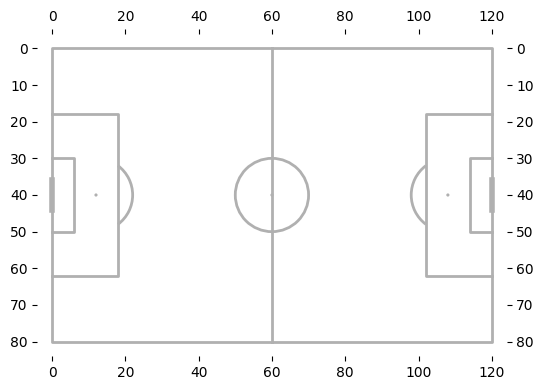

In [228]:
pitch = Pitch(label=True, tick=True)
fig, ax = pitch.draw(figsize=(8, 4))

t = result_touches_df[result_touches_df["possession_team"]=="Schalke 04"]
t1 = result_touches_df[(result_touches_df["possession_team"]=="Schalke 04") & (result_touches_df["period"] == 2) & result_touches_df['ends_attacking_third']]
"""pitch.arrows(
    t1.loc[t1["is_carry"]==True,"x"],t1.loc[t1["is_carry"]==True,"y"],
    t1.loc[t1["is_carry"]==True,"x_end_carry"],t1.loc[t1["is_carry"]==True,"y_end_carry"],
    ax=ax,width=1 ,color='lightblue'

)"""
pitch_width = 120
goal_x_min = pitch_width - 6
goal_x_max = pitch_width
goal_y_min = 40 - 10
goal_y_max = 40 + 10
ax.scatter(120, 40, c='lightblue', s=50, edgecolors='black', zorder=5)
#ax.scatter(result_touches_df.loc[result_touches_df["is_carry"]==True,"x"], result_touches_df.loc[result_touches_df["is_carry"]==True,"y"], c='lightblue', s=50, edgecolors='black', zorder=5)

## __Generate Dribblins__

In [ ]:
def is_in_penalty_area(x, y):
    pitch_width = 120
    x_axis = ((102 <= x) and (x <= pitch_width))  # Stop before goal area
    y_axis = ((40 - 22) <= y and y <= (40 + 22))
    return x_axis and y_axis

def is_in_defensive_penalty_area(x, y):
    x_axis = ((0 <= x) and (x <= 18))  # Stop before goal area
    y_axis = ((40 - 22) <= y and y <= (40 + 22))
    return x_axis and y_axis

def is_in_edge_of_the_box(x,y):
    pitch_width = 120
    x_axis = ((102 <= x) and (x <= pitch_width))
    y_axis = ((40 - 10) <= y and y <= (40 + 10))
    return x_axis and y_axis

def analyze_touches(df):
    """
    This function Pre-compute all conditions for Vectorize operations.
    Returns results grouped by player and under_pressure  
    """
    # Pre-compute all conditions
    df_with_flags = df.copy()

    # Location-based flags
    df_with_flags['is_attacking_third'] = df['x'] >= 80
    df_with_flags['is_middle_third'] = (80 > df['x']) & (df['x'] > 40)
    df_with_flags['is_defending_third'] = df['x'] <= 40
    df_with_flags['is_in_box'] = df.apply(lambda row: is_in_penalty_area(row['x'], row['y']), axis=1)
    df_with_flags['is_in_edge_box'] = df.apply(lambda row: is_in_edge_of_the_box(row['x'], row['y']), axis=1)
    df_with_flags['is_in_defending_box'] = df.apply(lambda row: is_in_defensive_penalty_area(row['x'], row['y']), axis=1)

    player_under_pressure_grouping = df_with_flags.groupby(['player', 'under_pressure']).agg(
        touches_total=('player', 'count'),
        touches_in_defending_penalty=("is_in_defending_box", "sum"),
        touches_in_defending_third=("is_defending_third", "sum"),
        touches_in_middle_third=("is_middle_third", "sum"),
        touches_in_attacking_third=("is_attacking_third", "sum"),
        touches_in_attacking_penalty=("is_in_box", "sum"),
    )

    total_stats = player_under_pressure_grouping.groupby('player').sum()
    player_under_pressure_grouping = player_under_pressure_grouping.add_prefix('up_')
    player_under_pressure_grouping = player_under_pressure_grouping.reset_index()
    player_under_pressure_grouping = player_under_pressure_grouping[player_under_pressure_grouping["under_pressure"] == True]
    player_under_pressure_grouping = player_under_pressure_grouping.drop("under_pressure", axis=1)

    player_stats = pd.merge(left=total_stats, right=player_under_pressure_grouping, on="player")

    calculation_pairs = [
        ("touches_in_defending_penalty","touches_total","touches_in_defending_penalty_%"),
        ("touches_in_defending_third","touches_total","touches_in_defending_third_%"),
        ("touches_in_middle_third","touches_total","touches_in_middle_third_%"),
        ("touches_in_attacking_third","touches_total","touches_in_attacking_third_%"),
        ("touches_in_attacking_penalty","touches_total","touches_in_attacking_penalty_%"),
    ]

    calculated_cols=[]
    for a, b, c in calculation_pairs:
        player_stats[c] = (player_stats[f'{a}'] / player_stats[f'{b}']).round(3)
        calculated_cols.append(c)

    new_columns = list(player_stats.columns) + calculated_cols

    return player_stats[new_columns]

result_touches_df = analyze_touches(df_touches)
result_touches_df